In [28]:
import os
import cv2
# import imghdr
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# extract the images

In [3]:
data_dir = 'data/Train'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
# # remove dodgy images
# for image_class in os.listdir(data_dir): 
#     for image in os.listdir(os.path.join(data_dir, image_class)):
#         image_path = os.path.join(data_dir, image_class, image)
#         try: 
#             img = cv2.imread(image_path)
#             tip = imghdr.what(image_path)
#             if tip not in image_exts: 
#                 print('Image not in ext list {}'.format(image_path))
#                 os.remove(image_path)
#         except Exception as e: 
#             print('Issue with image {}'.format(image_path))
#             # os.remove(image_path)

In [5]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 23650 files belonging to 2 classes.


In [6]:
# data_iterator = data.as_numpy_iterator()
# batch = data_iterator.next()

In [7]:
# batch[0]

In [8]:
# batch[1]

In [9]:
# fig, ax = plt.subplots(ncols=4, figsize=(20,20))
# for idx, img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img.astype(int))
#     ax[idx].title.set_text(batch[1][idx])

# scaling the data

In [10]:
data = data.map(lambda x,y: (x/255, y))  # scaling, reload the data cell

In [11]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

In [12]:
batch[0].max()

np.float32(1.0)

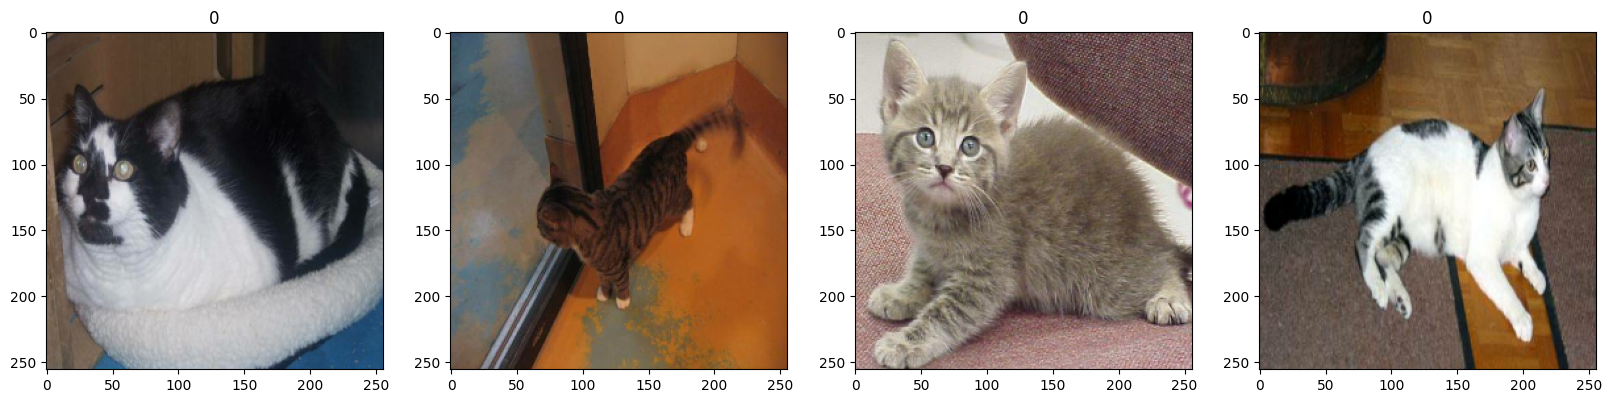

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # no int as after lamba function, these aren't int.
    ax[idx].title.set_text(batch[1][idx])

In [14]:
batch[0].shape

(32, 256, 256, 3)

# split the data

In [32]:
len(data)

740

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)

In [35]:
train_size

518

In [31]:
train_size+val_size

740

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

# build the model

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
model = Sequential()

In [37]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3))) # relu -> neg vals are 0, pos vals are preserved.
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))    # Helps prevent overfitting
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))    # for binary classification, sigmoid is used. range=[0,1]

In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,048,257 (26.89 MB)

 Trainable params: 7,045,185 (26.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

# train the model

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [41]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 387s 742ms/step - accuracy: 0.5823 - loss: 0.7675 - val_accuracy: 0.6026 - val_loss: 0.7227
Epoch 2/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 374s 721ms/step - accuracy: 0.7145 - loss: 0.5609 - val_accuracy: 0.7396 - val_loss: 0.5262
Epoch 3/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 375s 723ms/step - accuracy: 0.7746 - loss: 0.4802 - val_accuracy: 0.7792 - val_loss: 0.4921
Epoch 4/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 407s 785ms/step - accuracy: 0.8041 - loss: 0.4294 - val_accuracy: 0.7755 - val_loss: 0.4686
Epoch 5/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 386s 745ms/step - accuracy: 0.8299 - loss: 0.3766 - val_accuracy: 0.7817 - val_loss: 0.4686
Epoch 6/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 373s 720ms/step - accuracy: 0.8537 - loss: 0.3327 - val_accuracy: 0.8049 - val_loss: 0.4458
Epoch 7/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 386s 745ms/step - accuracy: 0.8830 - loss: 0.2795 - val_accuracy: 0.7848 - val_loss: 0.5114
Epoch 8/10
518/518 ━━━━━━━━━━━━━━━━━━━━ 386s 745ms/step - accuracy: 0.9084 -

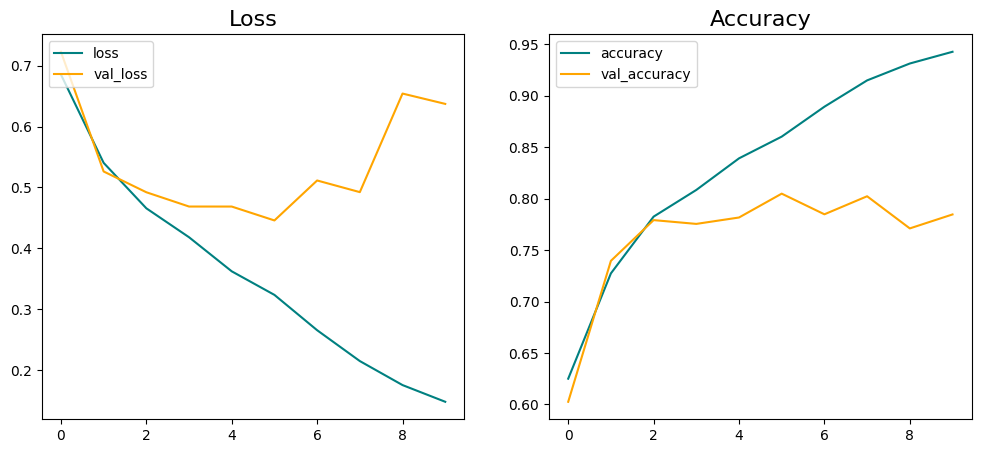

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Loss plot
ax[0].plot(hist.history['loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[0].set_title('Loss', fontsize=16)
ax[0].legend(loc="upper left")

# Accuracy plot
ax[1].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[1].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax[1].set_title('Accuracy', fontsize=16)
ax[1].legend(loc="upper left")

plt.show()

# test the model

In [53]:
test_data = tf.keras.utils.image_dataset_from_directory('data/Test')

Found 3863 files belonging to 2 classes.


In [54]:
test_data = test_data.map(lambda x, y: (x/255, y))

test_data_iterator = test_data.as_numpy_iterator()
batch = test_data_iterator.next()

In [55]:
batch[0].max()

np.float32(1.0)

In [56]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

for batch in test_data_iterator: 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [57]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.82525307, shape=(), dtype=float32) tf.Tensor(0.81397796, shape=(), dtype=float32) tf.Tensor(0.82197857, shape=(), dtype=float32)


In [66]:
import cv2
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Cat


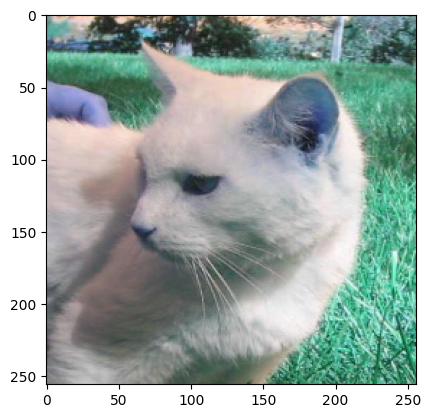

In [108]:
cat_img = cv2.imread('data/Test/Cat/cat.1832.jpg')
resize_cat = tf.image.resize(cat_img, (256,256))
yhat = model.predict(np.expand_dims(resize_cat/255, 0))
if yhat > 0.5:
    print('Dog')
else:
    print('Cat')
plt.imshow(resize_cat.numpy().astype(int))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Dog


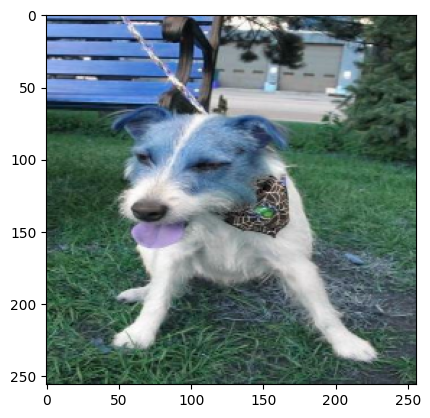

In [109]:
dog_img = cv2.imread('data/Test/Dog/dog.4059.jpg')
resize_dog = tf.image.resize(dog_img, (256,256))
yhat = model.predict(np.expand_dims(resize_dog/255, 0))
if yhat > 0.5:
    print('Dog')
else:
    print('Cat')
plt.imshow(resize_dog.numpy().astype(int))
plt.show()